# Chapter 11-2. RNN - hihello / charseq

## 'Hihello' example
- data setting
    - one hot encoding
- cross entropy loss
- code

'h' 'i' 'h' 'e' 'l' 'l' 'o'

character → 다음 charecter 예측하는 모델
</br> RNN의 *Hidden State* 역할 중요

We will predict the next character

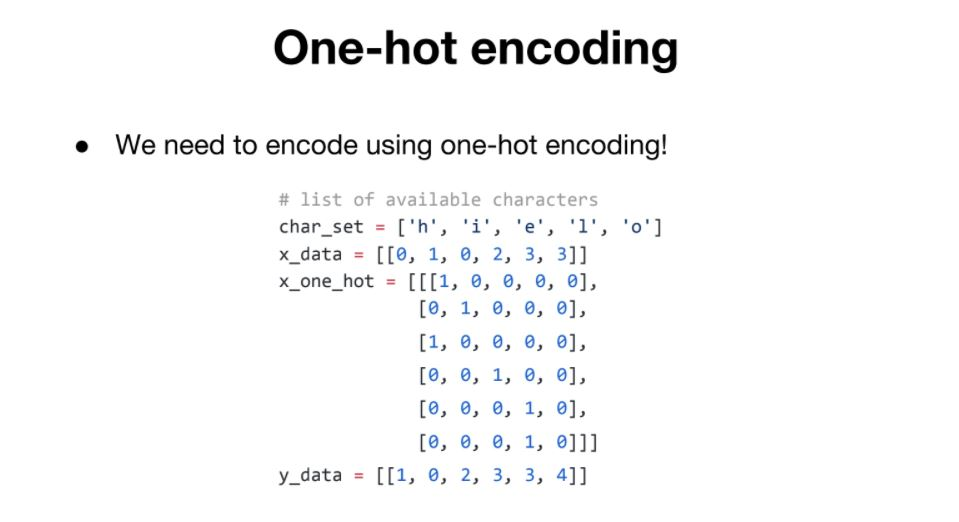

### Represent Characters
- by index
- encode using one-hot encoding
    - o가 맨 마지막에 존재: input으로 사용되지 않음
    - input: 마지막 빼고 다 (x의 경우 o를 포함 안 함)
    - output: 첫 번째 빼고 다

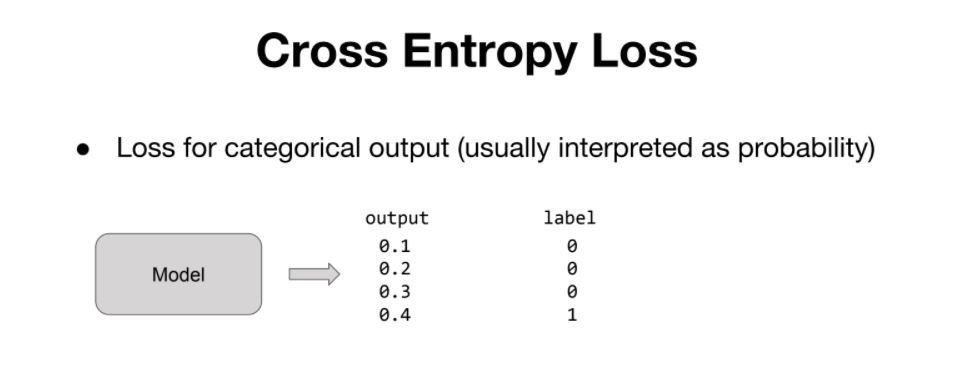

### Cross Entropy Loss
- Loss for *categorical* output (usually interpreted as probability)

```python

criterion = torch.nn.CrossEntropyLoss

...

loss = criterion(outputs.view(-1, input_size), Y.view(-1))

```


> 첫 번째 파라미터: model의 output
> 두 번째 파라미터: 정답 label

### Code Run Through - **hihello**

In [3]:
import torch
import torch.optim as optim
import numpy as np

In [4]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [5]:
# declare dictionary
char_set = ['h', 'i', 'e', 'l', 'o']

In [6]:
# hyper parameters
input_size = len(char_set)
hidden_size = len(char_set) # 다른 사이즈도 상관없음
learning_rate = 0.1

In [11]:
# data setting
x_data = [[0, 1, 0, 2, 3, 3]]
# one how encoding
x_one_hot = [[[1, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 1, 0]]]
# 앞 h를 뺀 y값
y_data = [[1, 0, 2, 3, 3, 4]]

In [12]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [13]:

# declare RNN
rnn = torch.nn.RNN(input_size, hidden_size, batch_first=True)  # batch_first guarantees the order of output = (B, S, F)

In [15]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

In [16]:
# start training
for i in range(100):
    optimizer.zero_grad()
    outputs, _status = rnn(X)
    loss = criterion(outputs.view(-1, input_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  1.6738981008529663 prediction:  [[0 0 0 3 0 0]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  hhhlhh
1 loss:  1.5152612924575806 prediction:  [[3 0 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  lhllll
2 loss:  1.3541594743728638 prediction:  [[2 0 3 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ehllll
3 loss:  1.211991310119629 prediction:  [[1 0 2 3 3 3]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihelll
4 loss:  1.086702585220337 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
5 loss:  0.9869017004966736 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
6 loss:  0.8826098442077637 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
7 loss:  0.8154295086860657 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
8 loss:  0.7510870099067688 prediction:  [[1 0 2 3 3 4]] true Y:  [[1, 0, 2, 3, 3, 4]] prediction str:  ihello
9 l

## Code Run Through - **charseq**

보다 일반화된 모델

In [17]:
import torch
import torch.optim as optim
import numpy as np

In [18]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [19]:
sample = " if you want you"

In [20]:
# make dictionary
char_set = list(set(sample)) 
char_dic = {c: i for i, c in enumerate(char_set)}
print(char_dic)

{'y': 0, 't': 1, 'f': 2, ' ': 3, 'o': 4, 'w': 5, 'i': 6, 'a': 7, 'n': 8, 'u': 9}


In [21]:
# hyper parameters
dic_size = len(char_dic)
hidden_size = len(char_dic)
learning_rate = 0.1

In [22]:
# data setting
sample_idx = [char_dic[c] for c in sample]
x_data = [sample_idx[:-1]] # 맨 마지막 제거
x_one_hot = [np.eye(dic_size)[x] for x in x_data]
# np.eye -> identity matrix
y_data = [sample_idx[1:]] # 맨 처음 제거

In [23]:
# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [24]:
# declare RNN
rnn = torch.nn.RNN(dic_size, hidden_size, batch_first=True)

In [25]:
# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn.parameters(), learning_rate)

In [26]:
# start training
for i in range(50):
    optimizer.zero_grad() 
    # 새로운 gradient 선언
    # 안 하면 예전에 쓰던 것 쓰게 되어 망함
    outputs, _status = rnn(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    result = outputs.data.numpy().argmax(axis=2)
    result_str = ''.join([char_set[c] for c in np.squeeze(result)])
    print(i, "loss: ", loss.item(), "prediction: ", result, "true Y: ", y_data, "prediction str: ", result_str)

0 loss:  2.392289161682129 prediction:  [[7 7 8 7 5 8 6 7 7 0 8 5 7 5 8]] true Y:  [[6, 2, 3, 0, 4, 9, 3, 5, 7, 8, 1, 3, 0, 4, 9]] prediction str:  aanawniaaynwawn
1 loss:  2.0708060264587402 prediction:  [[1 1 8 0 0 8 0 1 0 1 1 0 0 0 1]] true Y:  [[6, 2, 3, 0, 4, 9, 3, 5, 7, 8, 1, 3, 0, 4, 9]] prediction str:  ttnyynytyttyyyt
2 loss:  1.8479894399642944 prediction:  [[0 4 8 0 0 9 3 5 0 1 1 0 0 0 9]] true Y:  [[6, 2, 3, 0, 4, 9, 3, 5, 7, 8, 1, 3, 0, 4, 9]] prediction str:  yonyyu wyttyyyu
3 loss:  1.680589199066162 prediction:  [[0 4 8 0 4 9 3 5 4 8 1 3 2 4 9]] true Y:  [[6, 2, 3, 0, 4, 9, 3, 5, 7, 8, 1, 3, 0, 4, 9]] prediction str:  yonyou wont fou
4 loss:  1.5697530508041382 prediction:  [[0 4 3 0 4 9 3 5 4 8 1 3 2 4 9]] true Y:  [[6, 2, 3, 0, 4, 9, 3, 5, 7, 8, 1, 3, 0, 4, 9]] prediction str:  yo you wont fou
5 loss:  1.4689306020736694 prediction:  [[0 4 3 0 4 9 3 5 4 8 1 3 0 4 9]] true Y:  [[6, 2, 3, 0, 4, 9, 3, 5, 7, 8, 1, 3, 0, 4, 9]] prediction str:  yo you wont you
6 loss:  1.3